# Unsupervised Clustering

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


### Reading the data

In [2]:
features= pd.read_excel("C:/Users/rodri/OneDrive/Desktop/tese/Data/FEATURES.xlsx",sheet_name="ca_msci_all")

#dropping a feature that is irrelevant
features.drop("NonLinAC_3", axis=1, inplace=True)

features.head()

,Market,Distrib_1,Distrib_2,LinAC_1,LinAC_2,NonLinAC_1,NonLinAC_2,SucDiff_1,STStat_1,Transition,...,STStat_2,STStat_3,LinAC_3,SucDiff_4,SucDiff_5,FluctAnal_1,FluctAnal_2,LinAC_4,LinAC_5,Target
0,AUST,-0.628448,-0.002993,648,1361,1.378233,-0.000014,0.172035,1111,0.074074,...,0.662407,-0.786864,0.998593,13,1.212339,0.122449,0.122449,0.001534,0.041522,1
1,AUS,-0.291838,-0.838775,496,1252,1.233724,-0.000012,0.130624,1224,0.062500,...,0.607335,-0.340148,0.999140,17,1.225494,0.387755,0.122449,0.001534,0.041550,1
2,BEL,0.405806,0.619117,271,891,1.284214,-0.000036,0.200153,1002,0.020576,...,0.508689,0.017634,0.998414,10,1.207689,0.142857,0.877551,0.003068,0.052222,1
3,CAN,-0.214653,-0.010993,550,1283,1.344646,-0.000022,0.147495,1364,0.074074,...,0.658318,-0.849732,0.998446,11,1.211300,0.122449,0.122449,0.003068,0.040806,1
4,DEN,-0.244693,-0.041949,485,1259,1.326683,-0.000006,0.121166,1233,0.062500,...,0.668541,-0.853565,0.998730,12,1.200378,0.836735,0.857143,0.003068,0.035382,1


### Standardizing the data

In [3]:
Scaler= StandardScaler()

#creating new colomuns with the standardized data, this allows to keep the data frame more organized and vizualize the changes
features[['Distrib_1S', 'Distrib_2S', 'LinAC_1S', 'LinAC_2S', 'NonLinAC_1S','NonLinAC_2S', 'SucDiff_1S', 'STStat_1S', 'TransitionS', 'PeriodicityS', 'SucDiff_2S', 'SucDiff_3S', 'STStat_2S', 'STStat_3S', 'LinAC_3S', 'SucDiff_4S', 'SucDiff_5S', 'FluctAnal_1S', 'FluctAnal_2S', 'LinAC_4S',
       'LinAC_5S']]= Scaler.fit_transform(features[['Distrib_1', 'Distrib_2', 'LinAC_1', 'LinAC_2', 'NonLinAC_1',
       'NonLinAC_2', 'SucDiff_1', 'STStat_1', 'Transition', 'Periodicity',
       'SucDiff_2', 'SucDiff_3', 'STStat_2', 'STStat_3', 'LinAC_3',
       'SucDiff_4', 'SucDiff_5', 'FluctAnal_1', 'FluctAnal_2', 'LinAC_4',
       'LinAC_5',]])

features_S=features[['Market','Distrib_1S', 'Distrib_2S', 'LinAC_1S', 'LinAC_2S', 'NonLinAC_1S','NonLinAC_2S', 'SucDiff_1S', 'STStat_1S', 'TransitionS', 'PeriodicityS', 'SucDiff_2S', 'SucDiff_3S', 'STStat_2S', 'STStat_3S', 'LinAC_3S', 'SucDiff_4S', 'SucDiff_5S', 'FluctAnal_1S', 'FluctAnal_2S', 'LinAC_4S',
       'LinAC_5','Target']]

features_S.describe()

,Distrib_1S,Distrib_2S,LinAC_1S,LinAC_2S,NonLinAC_1S,NonLinAC_2S,SucDiff_1S,STStat_1S,TransitionS,PeriodicityS,...,STStat_2S,STStat_3S,LinAC_3S,SucDiff_4S,SucDiff_5S,FluctAnal_1S,FluctAnal_2S,LinAC_4S,LinAC_5,Target
count,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,...,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,4.600000e+01,46.000000,46.000000
mean,-4.827057e-18,-5.309762e-17,-3.137587e-17,-4.284013e-17,1.013682e-15,1.448117e-17,-1.158494e-16,9.654113e-18,-2.461799e-16,1.580861e-16,...,-8.205996e-17,-3.620292e-17,2.446594e-13,1.838807e-16,-4.658110e-15,-4.827057e-17,1.472252e-16,-4.827057e-18,0.049047,0.500000
std,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00,...,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00,1.011050e+00,0.017365,0.505525
min,-1.658909e+00,-1.695632e+00,-1.675948e+00,-1.531443e+00,-2.970575e+00,-5.456020e+00,-1.612620e+00,-2.153301e+00,-1.679174e+00,-8.182537e-01,...,-2.837165e+00,-9.007051e-01,-2.970979e+00,-2.418897e+00,-2.147880e+00,-8.211809e-01,-1.235946e+00,-9.299811e-01,0.020618,0.000000
25%,-8.410644e-01,-8.697104e-01,-8.142709e-01,-6.490168e-01,-5.630518e-01,-1.455656e-01,-7.193558e-01,-6.167762e-01,-5.934157e-01,-8.182537e-01,...,-3.293199e-01,-7.831013e-01,-4.963860e-01,-6.992812e-01,-6.452016e-01,-8.211809e-01,-1.173263e+00,-9.299811e-01,0.037175,0.000000
50%,-2.395996e-01,-1.396152e-02,-2.471402e-01,-2.774919e-01,2.907538e-01,1.002538e-01,-5.098524e-02,-2.892629e-01,3.136179e-02,-8.182537e-01,...,5.481884e-01,-3.558296e-01,2.384936e-01,8.795990e-03,9.611887e-02,-6.151392e-01,4.564961e-01,4.068667e-01,0.048950,0.500000
75%,8.097662e-01,8.041545e-01,1.052480e+00,3.635534e-01,6.820351e-01,2.017540e-01,4.079817e-01,8.143521e-01,3.769246e-01,8.231865e-01,...,6.656694e-01,3.534428e-01,6.558270e-01,4.134115e-01,5.448912e-01,6.726218e-01,1.067656e+00,4.068667e-01,0.056246,1.000000
max,1.914301e+00,1.749089e+00,1.734587e+00,2.773848e+00,1.339291e+00,3.024808e+00,2.642003e+00,2.090434e+00,3.141427e+00,2.027580e+00,...,8.352682e-01,3.217105e+00,1.482643e+00,2.841105e+00,2.307332e+00,1.720001e+00,1.083326e+00,4.417410e+00,0.100476,1.000000


### Reducing the data to 2D

In [4]:
#creating a pca model to reduce data to 2 dimensions
pca =PCA(n_components=2)

#fiting a pca model with the 21 canonical features standardized
pca.fit(features_S[['Distrib_1S', 'Distrib_2S', 'LinAC_1S', 'LinAC_2S', 'NonLinAC_1S',
       'NonLinAC_2S', 'SucDiff_1S', 'STStat_1S', 'TransitionS', 'PeriodicityS',
       'SucDiff_2S', 'SucDiff_3S', 'STStat_2S', 'STStat_3S', 'LinAC_3S',
       'SucDiff_4S', 'SucDiff_5S', 'FluctAnal_1S', 'FluctAnal_2S', 'LinAC_4S',
       'LinAC_5']])



#reducing the standardized canonical features to 2 dimensions
features_S[["Principal Component 1", "Principal Component 2"]]=pca.transform(features_S[['Distrib_1S', 'Distrib_2S', 'LinAC_1S', 'LinAC_2S', 'NonLinAC_1S',
       'NonLinAC_2S', 'SucDiff_1S', 'STStat_1S', 'TransitionS', 'PeriodicityS',
       'SucDiff_2S', 'SucDiff_3S', 'STStat_2S', 'STStat_3S', 'LinAC_3S',
       'SucDiff_4S', 'SucDiff_5S', 'FluctAnal_1S', 'FluctAnal_2S', 'LinAC_4S',
       'LinAC_5']])

#storing the principal components in a new data frame to keep it more organized
features_pca=features_S[["Market",'Principal Component 1', 'Principal Component 2', "Target"]]

#how much variability each component explains
print(pca.explained_variance_ratio_*100)

print(features_pca.describe())

[41.35155764 12.27216413]
       Principal Component 1  Principal Component 2     Target
count           4.600000e+01           4.600000e+01  46.000000
mean            8.688702e-17           3.861645e-17   0.500000
std             2.907614e+00           1.583986e+00   0.505525
min            -4.890966e+00          -3.167399e+00   0.000000
25%            -2.594923e+00          -1.356550e+00   0.000000
50%             3.577783e-01           6.808819e-02   0.500000
75%             2.154404e+00           9.797282e-01   1.000000
max             7.142064e+00           4.029297e+00   1.000000


C:\Users\rodri\AppData\Local\Temp\ipykernel_12888\2958683837.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_S[["Principal Component 1", "Principal Component 2"]]=pca.transform(features_S[['Distrib_1S', 'Distrib_2S', 'LinAC_1S', 'LinAC_2S', 'NonLinAC_1S',
C:\Users\rodri\AppData\Local\Temp\ipykernel_12888\2958683837.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_S[["Principal Component 1", "Principal Component 2"]]=pca.transform(features_S[['Distrib_1S', 'Distrib_2S', 'LinAC_1S',

### Rescalling the data

In [5]:
#We have to rescalle the data again

#Creating a MinMax model with values ranging from -1 to 1
MinMaxS =MinMaxScaler(feature_range=(-1,1))

#fiting the model to the pca values
MinMaxS.fit(features_pca[["Principal Component 1", "Principal Component 2"]])

features_pca[["Principal Component 1", "Principal Component 2"]]= MinMaxS.transform(features_pca[["Principal Component 1", "Principal Component 2"]])

#storing in a new dataframe to keep it organized
features_MinMax = features_pca

C:\Users\rodri\AppData\Local\Temp\ipykernel_12888\843893988.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_pca[["Principal Component 1", "Principal Component 2"]]= MinMaxS.transform(features_pca[["Principal Component 1", "Principal Component 2"]])


### KMeans clustering

In [6]:
#we know that we want 2 clusters(develop and emergent markets), so there is no need to optimaze the cluster number with elbow method
kmeans=KMeans(n_clusters=2)

#Fitting the KMeans model to the preprocessed data
y_pred=kmeans.fit_predict(features_MinMax[["Principal Component 1", "Principal Component 2"]])

#Storing the clusters in the data frame
features_MinMax["Cluster"]=y_pred
features_cluster=features_MinMax

C:\Users\rodri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\rodri\AppData\Local\Temp\ipykernel_12888\2711709684.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_MinMax["Cluster"]=y_pred


### Vizualising Clusters

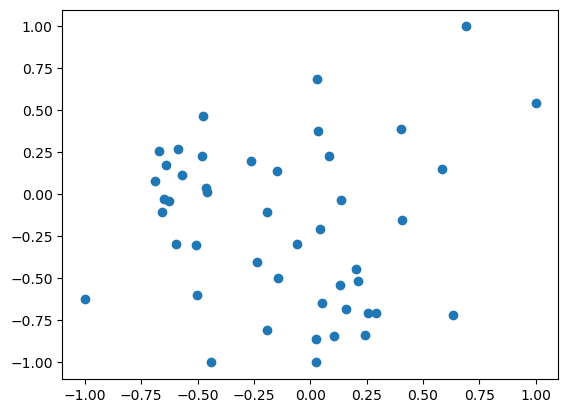

In [7]:
#visualizing the points, without the cluster
plt.scatter(features_MinMax["Principal Component 2"],features_MinMax["Principal Component 1"])

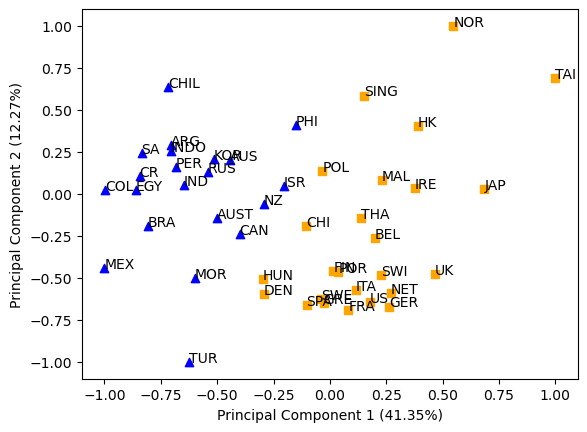

In [8]:
#separating the clusters identified 
Developed=features_cluster[features_cluster.Cluster==1]
Emerging=features_cluster[features_cluster.Cluster==0]

#Visualizing the data with the clusters
plt.scatter(Developed["Principal Component 1"], Developed["Principal Component 2"], color="orange", marker="s")
plt.scatter(Emerging["Principal Component 1"], Emerging["Principal Component 2"], color="blue", marker="^")

for i in range(features_cluster.shape[0]):
    plt.text(features_cluster["Principal Component 1"][i],features_cluster["Principal Component 2"][i],features_cluster["Market"][i])

plt.xlabel("Principal Component 1 (41.35%)")
plt.ylabel("Principal Component 2 (12.27%)")

plt.show()

### Measuring accuracy

In [9]:
#Since we know the real label for the target variable, we can calculate the accuraccy of our clustering model
count = 0
for i in range(features_cluster.shape[0]):
    if features_cluster["Target"][i]==features_cluster["Cluster"][i]:
        count+=1
print(count/features_cluster.shape[0]*100, "% accuracy")

78.26086956521739 % accuracy


# Supervised Clustering

### Obtaining shap values

In [10]:
import xgboost as xgb
import shap
import lightgbm as lgb
import umap
shap.initjs()

In [11]:
features1= pd.read_excel("C:/Users/rodri/OneDrive/Desktop/tese/Data/FEATURES.xlsx",sheet_name="ca_msci_all")
features1.drop("NonLinAC_3", axis=1, inplace=True)

# Training and fitting a simple xgboost classifier model
X = features1.drop(["Market","Target"], axis= 1)
Y= features1["Target"]

model = xgb.XGBClassifier().fit(X, Y)

# Computing of SHAP values
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

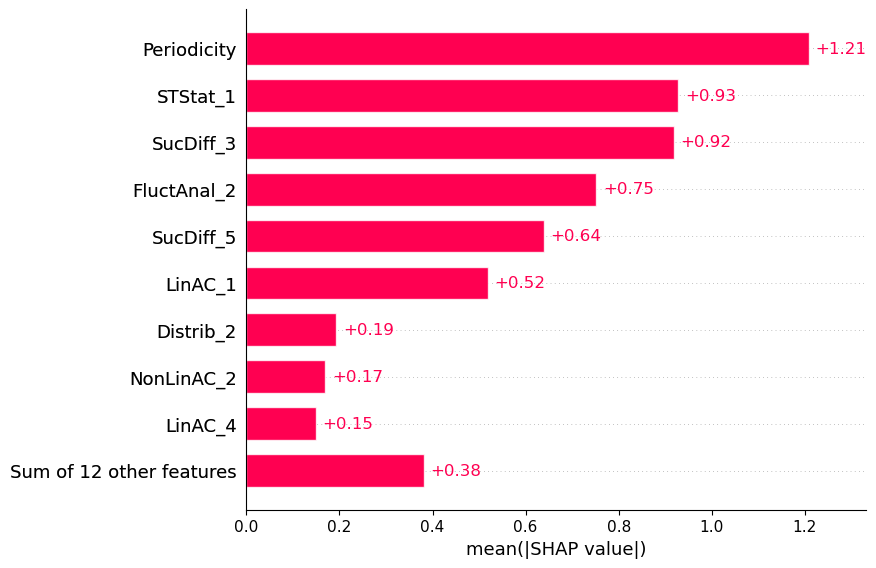

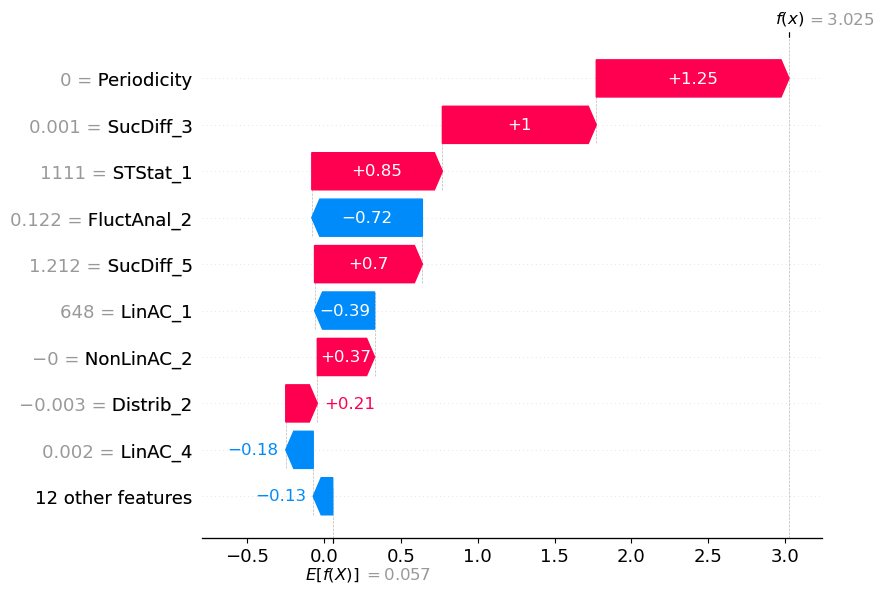

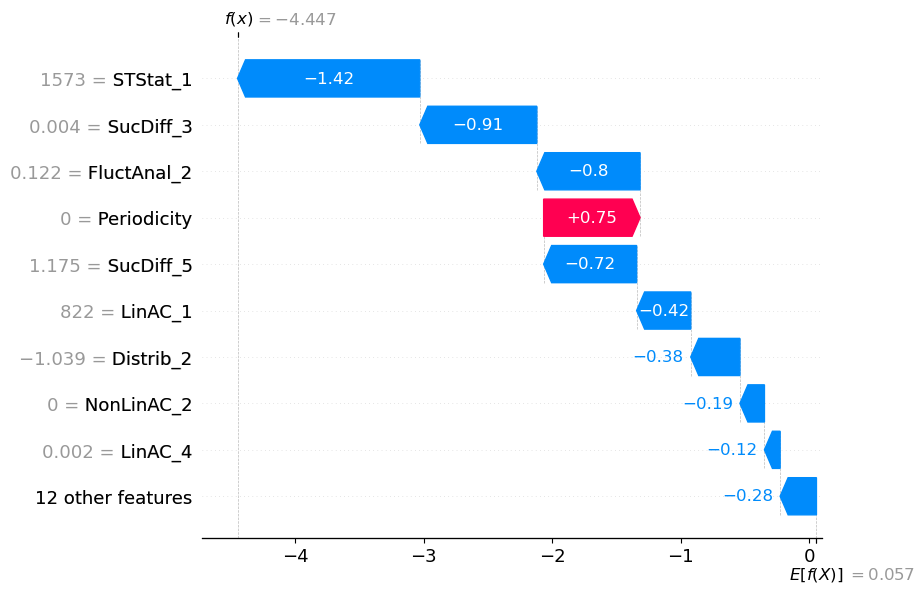

In [12]:
#Visualization of the mean SHAP values
shap.plots.bar(shap_values)

#Visualization of the SHAP values for both 1 developed and 1 emerging market
shap.plots.waterfall(shap_values[0], max_display=10)
shap.plots.waterfall(shap_values[27], max_display=10)

### Using UMAP to reduce the data dimension and preprocess it

<AxesSubplot:>

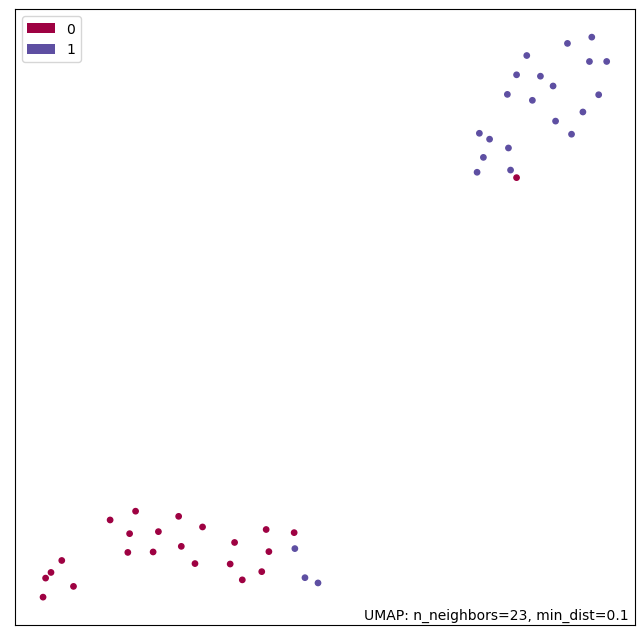

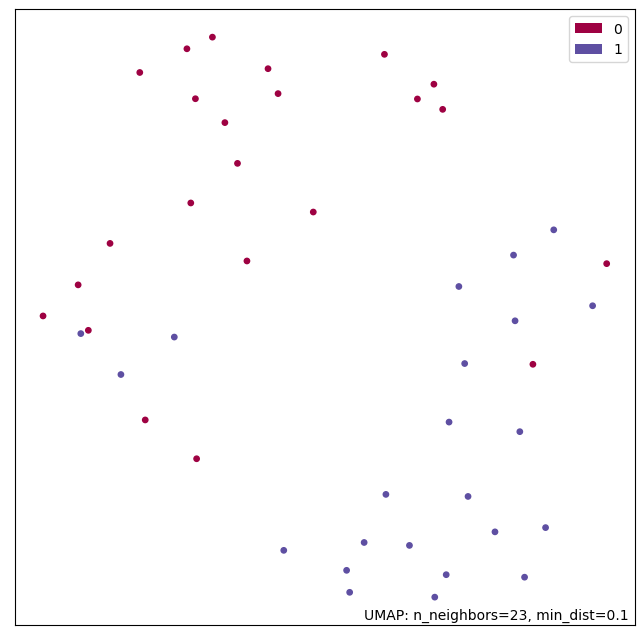

In [13]:
#Visualizing both the shap and raw values in 2 dimensions without standardizing the data

raw = umap.UMAP(
  n_components=2, n_neighbors=23).fit(X)

shaps = umap.UMAP(
  n_components=2, n_neighbors=23).fit(shap_values.values)


import umap.plot
umap.plot.points(shaps,labels=features1.Target)
umap.plot.points(raw,labels=features1.Target)

### Using cluster on SHAP values

In [14]:
#from sklearn.cluster import DBSCAN
#s_labels = DBSCAN(eps=1, min_samples=4).fit(s_2d).labels_

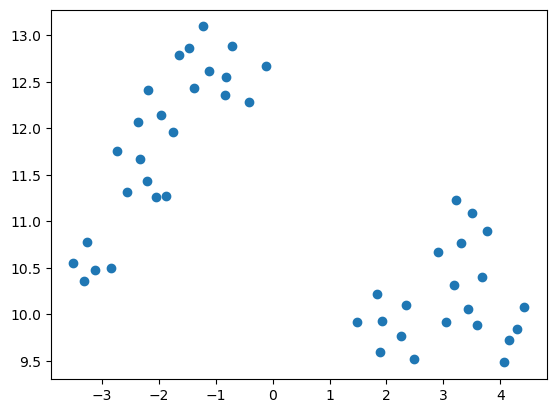

In [15]:
# Standardizing and reducing to 2 dimensions the SHAP values with UMAP
s_2d = umap.UMAP(
  n_components=2, n_neighbors=23).fit_transform(shap_values.values)

#Visualizing without clusters
plt.scatter(s_2d[:,0], s_2d[:,1])

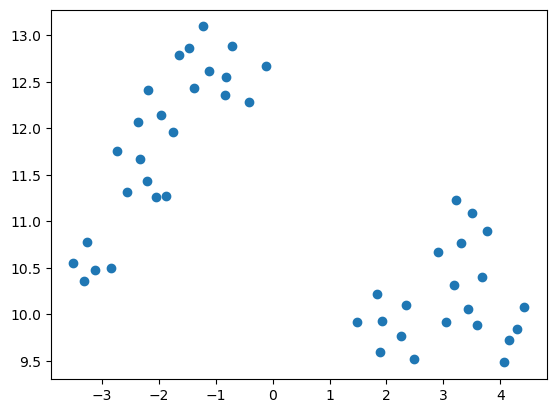

In [16]:
plt.scatter(s_2d[:,0], s_2d[:,1])

In [17]:
shap_pred=kmeans.fit_predict(s_2d)

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


In [22]:
#fitting the KMeans cluster to the SHAP values after the preprocessing
shap_pred=kmeans.fit_predict(s_2d)

#storing the values in a new data frame to better organize the data
shapdf= pd.DataFrame(s_2d, columns= ["Principal Component 1", "Principal Component 2"])
shapdf["cluster"]=shap_pred
shapdf["Target"]=features_cluster.Target
shapdf["Market"]=features_cluster.Market

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


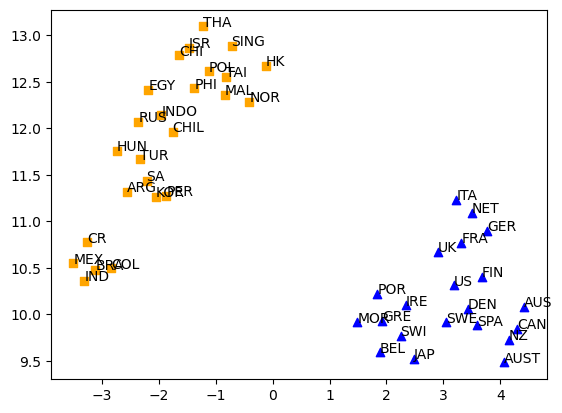

In [23]:
#Visualization of the clusters with SHAP values
ShapDev= shapdf[shapdf.cluster==0]
ShapEmerg= shapdf[shapdf.cluster==1]

plt.scatter(ShapDev["Principal Component 1"], ShapDev["Principal Component 2"], color="orange", marker="s")
plt.scatter(ShapEmerg["Principal Component 1"], ShapEmerg["Principal Component 2"], color="blue", marker="^")

for i in range(shapdf.shape[0]):
    plt.text(shapdf["Principal Component 1"][i],shapdf["Principal Component 2"][i],shapdf["Market"][i])


plt.show()

In [24]:
#Checking the accuracy of the clustering model
count2 = 0
for i in range(shapdf.shape[0]):
    if shapdf["Target"][i]==shapdf["cluster"][i]:
        count2+=1
print(count2/shapdf.shape[0]*100, "% accuracy")

91.30434782608695 % accuracy


### Trying to identify new clusters

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than

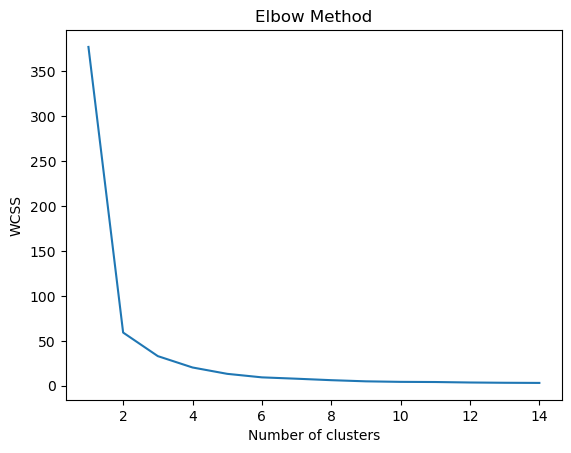

In [25]:
#WE use the Elbow method to see how many clusters we can use

wcss = []

for i in range(1, 15):
    #model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    model =KMeans(n_clusters=i)
    model.fit(shapdf[["Principal Component 1", "Principal Component 2"]])
    wcss.append(model.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [26]:
#Creating a new KMeans model with 4 clusters
kmeans2= KMeans(n_clusters=4)

#Fitting the model to the 2D SHAP values
shap_pred2=kmeans2.fit_predict(s_2d)
shap_pred2

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.


array([1, 1, 3, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 1, 0, 1, 3, 0, 1, 1, 3, 1,
       1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 3, 2, 0, 0, 2, 2, 0,
       0, 2])

In [27]:
#Putting everything in a data frame, so it's easier to visualize and organize 
shapclust= pd.DataFrame(s_2d, columns= ["Principal Component 1", "Principal Component 2"])

shapclust["cluster"]=shap_pred2
shapclust["Target"]=features_cluster.Target
shapclust["Market"]=features_cluster.Market

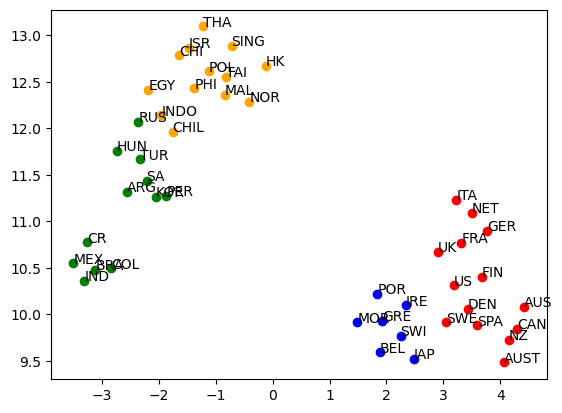

In [28]:
#Visualizing the 4 clusters identified

Shapclust1= shapclust[shapclust.cluster==0] 
Shapclust2= shapclust[shapclust.cluster==1] 
Shapclust3= shapclust[shapclust.cluster==2] 
Shapclust4= shapclust[shapclust.cluster==3] 

plt.scatter(Shapclust1["Principal Component 1"], Shapclust1["Principal Component 2"], color="orange")
plt.scatter(Shapclust2["Principal Component 1"], Shapclust2["Principal Component 2"], color="red")
plt.scatter(Shapclust3["Principal Component 1"], Shapclust3["Principal Component 2"], color="green")
plt.scatter(Shapclust4["Principal Component 1"], Shapclust4["Principal Component 2"], color="blue")

for i in range(shapdf.shape[0]):
    plt.text(shapdf["Principal Component 1"][i],shapdf["Principal Component 2"][i],shapdf["Market"][i])
    
plt.show()